Importing Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing Dataset

In [12]:
dataset = pd.read_excel('/content/Data Nifty.xlsx')
X = dataset['Date'].values
y = dataset['Close Price'].values

dataset.head(5)

Date  Close Price
0 2000-01-03       1592.2
1 2000-01-04       1638.7
2 2000-01-05       1595.8
3 2000-01-06       1617.6
4 2000-01-07       1613.3

Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [14]:
# split_percentage = 0.95
# split = int(split_percentage*len(df))
  
# # Train data set
# X_train = X[:split]
# y_train = y[:split]
  
# # Test data set
# X_test = X[split:]
# y_test = y[split:]

Training the Random Forest Regression model on the training set


In [15]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42, bootstrap = True, oob_score = True)
regressor.fit(X_train.reshape(-1, 1), y_train.ravel())

RandomForestRegressor(oob_score=True, random_state=42)

Predicting the Results


In [16]:
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

array([1180.704 , 1074.098 ,  989.8695, 1091.9455, 1537.3805, 1191.557 ,
       1476.2085, 1227.3495, 1372.415 , 1062.5765, 1052.232 , 1602.7935,
       1020.7035, 1084.088 ,  983.4015, 1042.54  ,  981.602 , 1088.2625,
       1039.621 , 1792.925 ,  961.0445, 1592.818 , 1005.4665, 1578.3665,
       1409.7555, 1438.9195, 1802.2845,  950.094 , 1072.8135, 1107.557 ,
       2082.3965, 1993.26  , 2051.913 , 1076.4835, 1401.5545, 1078.115 ,
       2045.1035, 1849.6795, 1336.1085, 1037.3605, 1556.8865, 1645.5005,
       1735.021 , 1081.273 , 2001.7015, 1561.34  , 1231.001 , 2065.2655,
       1007.8355, 1996.1955, 1946.447 , 1447.0405, 1062.808 , 1715.9065,
       1079.3   , 1373.1935, 1806.335 , 1494.6995, 1667.5515, 1064.7075,
       1174.5875, 2027.328 , 1471.046 , 1106.846 , 1915.7825, 1194.263 ,
       1068.7595, 1265.933 , 1342.3225, 1069.6495, 1433.9305, 1093.98  ,
        924.6345, 1093.3225, 1436.8655, 1249.085 , 1245.8235, 1131.6615,
       1943.4715, 1000.143 ,  956.3955, 1064.398 , 

Comparing the Real Values with Predicted Values


In [17]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

Real Values  Predicted Values
0        1174.75         1180.7040
1        1067.95         1074.0980
2         976.85          989.8695
3        1089.20         1091.9455
4        1558.80         1537.3805
..           ...               ...
131      2074.70         2048.5615
132      1794.75         1795.8775
133      1069.75         1072.7655
134      1046.20         1037.5235
135      1370.80         1388.9420

[136 rows x 2 columns]

Visualising the Random Forest Regression Results


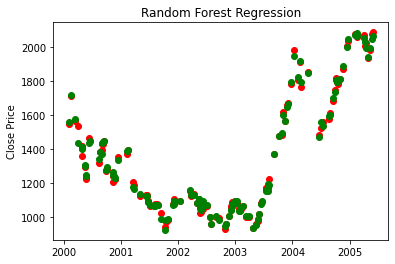

In [18]:
# # Visualising the Random Forest Regression Results  
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.ylabel('Close Price')
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the MAE and MSE
print("MAE:", mae)
print("MSE:", mse)


MAE: 11.615742647058848
MSE: 273.0217380698564


In [20]:
from sklearn.metrics import r2_score

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 score:", r2)


R2 score: 0.9975761046314615
